In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

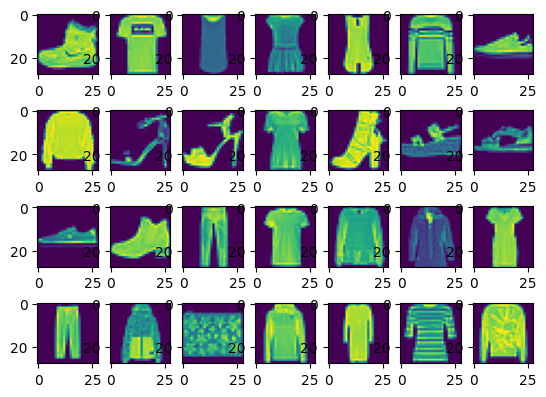

In [5]:
for i in range(28):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [6]:
input_shape = (28, 28, 1)

In [7]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Сделаем модель с 1 сверточным слоем

In [8]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50, activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [9]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.4243 - accuracy: 0.8504 - val_loss: 0.3329 - val_accuracy: 0.8823
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2870 - accuracy: 0.8978 - val_loss: 0.3049 - val_accuracy: 0.8876
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2452 - accuracy: 0.9109 - val_loss: 0.2845 - val_accuracy: 0.8957
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2169 - accuracy: 0.9199 - val_loss: 0.2687 - val_accuracy: 0.9038
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1931 - accuracy: 0.9285 - val_loss: 0.2833 - val_accuracy: 0.9002
CPU times: total: 9min 37s
Wall time: 2min 52s


Точность модели: 90,4%

Проверим модель без сверточного слоя

In [11]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [12]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5193 - accuracy: 0.8202 - val_loss: 0.4568 - val_accuracy: 0.8347
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3909 - accuracy: 0.8620 - val_loss: 0.4102 - val_accuracy: 0.8540
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3571 - accuracy: 0.8712 - val_loss: 0.3911 - val_accuracy: 0.8604
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3334 - accuracy: 0.8793 - val_loss: 0.3869 - val_accuracy: 0.8609
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3156 - accuracy: 0.8849 - val_loss: 0.3712 - val_accuracy: 0.8690
CPU times: total: 50.8 s
Wall time: 31.8 s


Точность у такой модели уже меньше 86,8%

Проверим модель с двумя сверточными слоями

In [14]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [15]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.4285 - accuracy: 0.8465 - val_loss: 0.3245 - val_accuracy: 0.8856
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2813 - accuracy: 0.8989 - val_loss: 0.2777 - val_accuracy: 0.8988
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2375 - accuracy: 0.9125 - val_loss: 0.2797 - val_accuracy: 0.8958
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2071 - accuracy: 0.9244 - val_loss: 0.2416 - val_accuracy: 0.9119
Epoch 5/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1811 - accuracy: 0.9336 - val_loss: 0.2522 - val_accuracy: 0.9126
CPU times: total: 18min 3s
Wall time: 4min 34s


Точность уже стала выше: 91,5%

Добавим 3 сверточный слой и увеличим кол-во эпох до 10.

In [17]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [18]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 [==============================] - 106s 54ms/step - loss: 0.4385 - accuracy: 0.8407 - val_loss: 0.3321 - val_accuracy: 0.8813
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2760 - accuracy: 0.8991 - val_loss: 0.2919 - val_accuracy: 0.8915
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2319 - accuracy: 0.9136 - val_loss: 0.2828 - val_accuracy: 0.8922
Epoch 4/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1996 - accuracy: 0.9261 - val_loss: 0.2368 - val_accuracy: 0.9137
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1761 - accuracy: 0.9342 - val_loss: 0.2448 - val_accuracy: 0.9125
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1524 - accuracy: 0.9434 - val_loss: 0.2411 - val_accuracy: 0.9160
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1341 - accuracy: 0.9495 - val_loss: 0.2369 

Точность модели: 91,9%

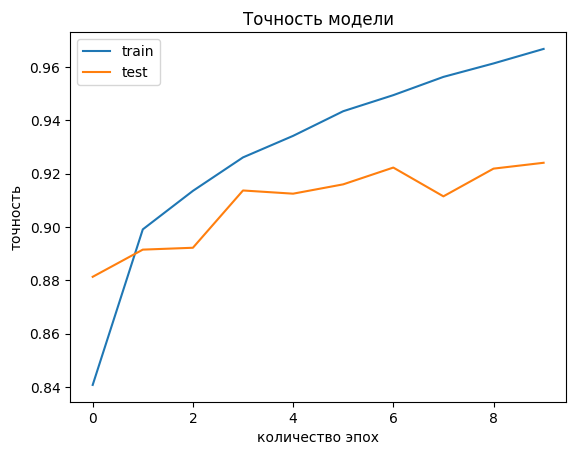

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

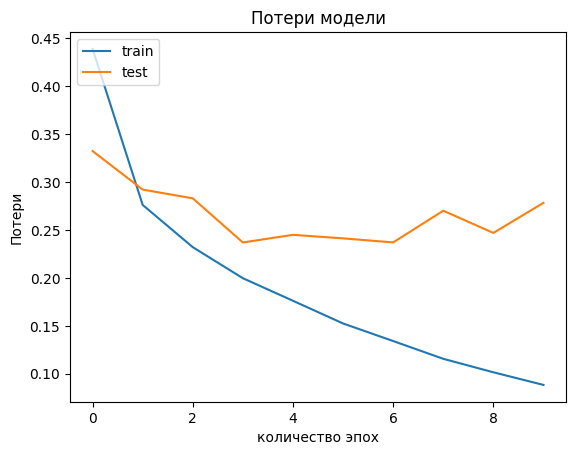

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [23]:
keras.utils.plot_model(model_4)

AttributeError: module 'pydot' has no attribute 'InvocationException'